In [3]:
# Loading the data
import pandas as pd
df=pd.read_csv('laptops.csv')
df.head()

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5


In [17]:
#pandas command to check dataset dimensions
num_rows = df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")
num_col = df.shape[1]
print(f"Number of Columns in the dataset: {num_col}")

Number of rows in the dataset: 205
Number of Columns in the dataset: 9


In [19]:
# Cleaning the data
# Count the number of missing values in each column
missing_values = df.isnull().sum()
missing_values

brand             0
laptop_name       1
display_size      0
processor_type    0
graphics_card     0
disk_space        0
discount_price    0
old_price         0
ratings_5max      0
dtype: int64

In [25]:
# Cleaning the data
# Drop rows with missing values
laptops_data_cleaned = df.dropna()
updated_num_rows = laptops_data_cleaned.shape[0]
print(f"Updated Number of rows in the dataset: {updated_num_rows}")

Updated Number of rows in the dataset: 204


In [27]:
# Cleaning the data
# Check for duplicates
duplicates = df.duplicated().sum()
duplicates

11

In [29]:
# Drop duplicates
laptops_data_no_duplicates = df.drop_duplicates()
updated_num_rows_dup = laptops_data_no_duplicates.shape[0]
print(f"Updated Number of rows in the dataset: {updated_num_rows_dup}")

Updated Number of rows in the dataset: 194


In [31]:
# cleaning the data
# getting data types of teh columns
df.dtypes

brand              object
laptop_name        object
display_size      float64
processor_type     object
graphics_card      object
disk_space         object
discount_price    float64
old_price         float64
ratings_5max       object
dtype: object

In [33]:
# cleaning the data
# creating a column price using old price and discount
df['new_price'] = df['old_price']  - df['discount_price']
df.head(5)

,brand,laptop_name,display_size,processor_type,graphics_card,disk_space,discount_price,old_price,ratings_5max,new_price
0,HP,Notebook 14-df0008nx,14.0,Intel Celeron N4000,Intel HD Graphics 600,64 GB (eMMC),1259.0,1259.0,0 / 5,0.0
1,Lenovo,IdeaPad 330S-14IKB,14.0,Intel Core i5-8250U,Intel UHD Graphics 620,1 TB HDD,1849.0,2099.0,3.3 / 5,250.0
2,Huawei,MateBook D Volta,14.0,Intel Core i5-8250U,NVIDIA GeForce MX150 (2 GB),256 GB SSD,2999.0,3799.0,0 / 5,800.0
3,Dell,Inspiron 15 3567,15.6,Intel Core i3-7020U,Intel HD Graphics 620,1 TB HDD,1849.0,1849.0,0 / 5,0.0
4,Asus,VivoBook 15 X510UR,15.6,Intel Core i7-8550U,NVIDIA GeForce 930MX (2 GB),1 TB HDD,2499.0,3149.0,0 / 5,650.0


In [41]:
# Cleaning the data 
# 1. Extract numeric part of disk space and handle both GB and TB
def convert_disk_space(value):
    if isinstance(value, float):  # Check if the value is already a float
        return value
    value = value.replace(',', '')  # Remove commas if present
    number = float(value.split()[0])  # Extract the numeric part
    unit = value.split()[1].upper()  # Extract the unit (GB or TB)

    # Convert to GB if the unit is TB
    if 'TB' in unit:
        return number * 1024  # 1 TB = 1024 GB
    elif 'GB' in unit:
        return number
    else:
        return None  # Return None for any unexpected formats

# Apply the function to the disk column
df['disk_space'] = df['disk_space'].apply(convert_disk_space)

# 2. Extract numeric part from the Ratings column
# Assuming Ratings column has values like "3 / 5"
df['ratings_5max'] = df['ratings_5max'].str.split('/').str[0].astype(float)

# Check the data types and verify the columns are converted correctly
print(df[['disk_space', 'ratings_5max']].head())
print(df.dtypes)
# Display the updated data types and the first few rows to verify the changes
print(df.dtypes)
print(df.head())

   disk_space  ratings_5max
0        64.0           0.0
1      1024.0           3.3
2       256.0           0.0
3      1024.0           0.0
4      1024.0           0.0
brand              object
laptop_name        object
display_size      float64
processor_type     object
graphics_card      object
disk_space        float64
discount_price    float64
old_price         float64
ratings_5max      float64
new_price         float64
dtype: object
brand              object
laptop_name        object
display_size      float64
processor_type     object
graphics_card      object
disk_space        float64
discount_price    float64
old_price         float64
ratings_5max      float64
new_price         float64
dtype: object
    brand           laptop_name  display_size        processor_type  \
0      HP  Notebook 14-df0008nx          14.0   Intel Celeron N4000   
1  Lenovo    IdeaPad 330S-14IKB          14.0   Intel Core i5-8250U   
2  Huawei      MateBook D Volta          14.0   Intel Core i5-8250U   


In [43]:
# 2. How many different laptop brands are there?
count_of_brands = df['brand'].nunique()
count_of_brands

9

In [45]:
# 3. What are the names and prices of the most and least expensive laptops after discounts
most_expensive = df.loc[df['new_price'].idxmax()]
least_expensive = df.loc[df['new_price'].idxmin()]

print("Most Expensive Laptop:", most_expensive['brand'], most_expensive['new_price'])
print("Least Expensive Laptop:", least_expensive['laptop_name'], least_expensive['new_price'])

Most Expensive Laptop: Acer 1500.0
Least Expensive Laptop: Notebook 14-df0008nx 0.0


In [87]:
# 4.  How are laptop prices distributed?
price_distribution = df['old_price'].describe().round(2)
price_distribution

count      205.00
mean      4040.36
std       2327.15
min        999.00
25%       2249.00
50%       3299.00
75%       5649.00
max      12499.00
Name: old_price, dtype: float64

In [89]:
# 5. What is the min, max, and mean display sizes?
display_size_stats = df['display_size'].agg(['min', 'max', 'mean']).round(2)
display_size_stats

min     12.00
max     18.40
mean    14.58
Name: display_size, dtype: float64

In [91]:
# 6. What is the average price for each brand?
avg_price_per_brand = df.groupby('brand')['old_price'].mean().round(2).sort_values(ascending=False)
avg_price_per_brand

brand
MSI          9071.00
Apple        7082.29
Microsoft    5132.33
Huawei       4040.67
Dell         3872.03
Asus         3393.09
HP           3382.54
Acer         2773.08
Lenovo       2216.39
Name: old_price, dtype: float64

In [93]:
#7. What is the average laptop price for each processor brand?
avg_price_per_processor = df.groupby('processor_type')['old_price'].mean().round(2).sort_values(ascending=False)
avg_price_per_processor

processor_type
Intel Core i9              12499.00
Intel Core i7 6 Core       10999.00
Intel Core i7-7820HK        7879.50
Intel Core i7-8750H         7749.00
Intel Core i7 Quad Core     7564.00
Intel Core i7-6700HQ        7507.00
Intel Core i7-7700HQ        7336.00
Intel Core i5 Quad Core     7157.75
Intel Core i5 Dual Core     5807.42
Intel Core M3               5669.00
Intel Core i7-8565U         4465.67
Intel Core i7-8550U         4229.00
Intel Core i7-7500U         4189.00
Intel Core i5-7200U         3279.00
Intel Core i5-8250U         3083.21
Intel Core i5-8265U         2822.53
AMD A9-9425                 1999.00
Intel Core i3-8130U         1889.00
Intel Core i3-8145U         1789.00
Intel Core i3-7020U         1756.50
Intel Core i3-6006U         1717.33
Intel Celeron N4000         1300.82
Intel Celeron 4205U         1299.00
Intel Celeron N3060         1209.00
Intel Core i3-5005U         1199.00
Intel Celeron N3350          999.00
Name: old_price, dtype: float64

In [95]:
#8. What are the average ratings for each laptop brand?
avg_ratings_per_brand = df.groupby('brand')['ratings_5max'].mean().round(2).sort_values(ascending=False)
avg_ratings_per_brand

brand
Huawei       2.43
Apple        2.28
Lenovo       2.17
Microsoft    1.37
Dell         1.17
HP           1.06
Acer         0.95
Asus         0.59
MSI          0.00
Name: ratings_5max, dtype: float64

In [75]:
#9. What is the average laptop price for each graphics card brand?
avg_price_per_graphics = df.groupby('graphics_card')['old_price'].mean().round(2).sort_values(ascending=False)
avg_price_per_graphics

graphics_card
Intel HD Graphics 6000                1100.00
Intel HD Graphics 615                  700.00
NVIDIA GeForce 930MX (2 GB)            650.00
NVIDIA GeForce MX250 (4 GB)            516.67
NVIDIA GeForce MX150 (4 GB)            500.00
NVIDIA GeForce MX110 (2 GB)            441.67
Intel Iris Plus Graphics 655           425.00
Radeon Pro 560X GDDR5 (4 GB)           400.00
NVIDIA GeForce MX150 (2 GB)            384.00
NVIDIA GeForce MX230 (2 GB)            375.00
Radeon Pro 555X GDDR5 (4 GB)           366.67
AMD Radeon 535 (2 GB)                  350.00
Intel UHD Graphics 617                 312.50
NVIDIA GeForce MX130 (2 GB)            306.15
NVIDIA GeForce MX130 (4 GB)            300.00
AMD Radeon 530M (4 GB)                 250.00
Intel UHD Graphics 620                 227.50
Intel GMA HD                           204.67
AMD Radeon 540 (4 GB)                  200.00
NVIDIA GeForce GTX 1050 Ti (4 GB)      200.00
AMD Radeon 520 (2 GB)                  166.67
Intel UHD Graphics 6

In [77]:
# 10. How many laptops have a discount price?
laptops_with_discount = df[df['discount_price'] > 0].shape[0]
laptops_with_discount

205

In [97]:
# 11. How is disk space related to the price?
disk_space_vs_price = df[['disk_space', 'old_price']].corr()
disk_space_vs_price

,disk_space,old_price
disk_space,1.000000,-0.274376
old_price,-0.274376,1.000000


In [99]:
# 12. How is display size related to price?
display_size_vs_price = df[['display_size', 'old_price']].corr()
display_size_vs_price

,display_size,old_price
display_size,1.000000,-0.214365
old_price,-0.214365,1.000000


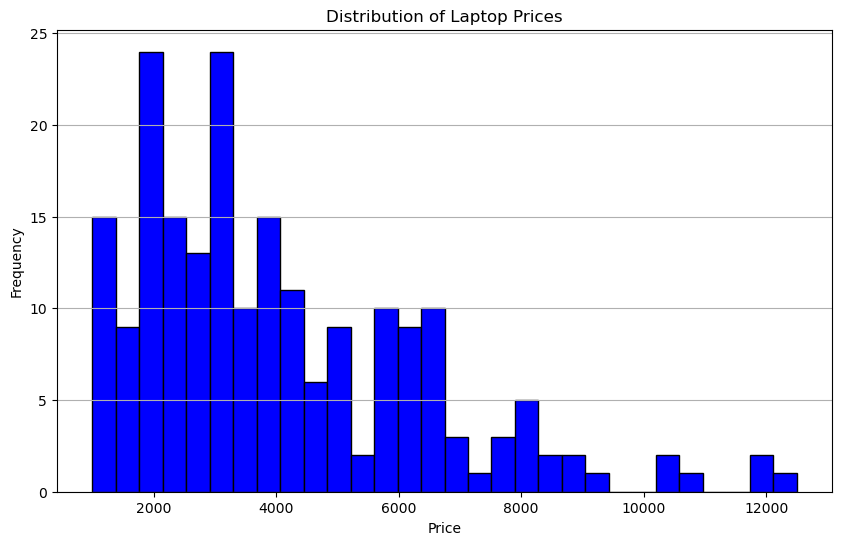

In [105]:
# Visualization to understand Laptop price distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['old_price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

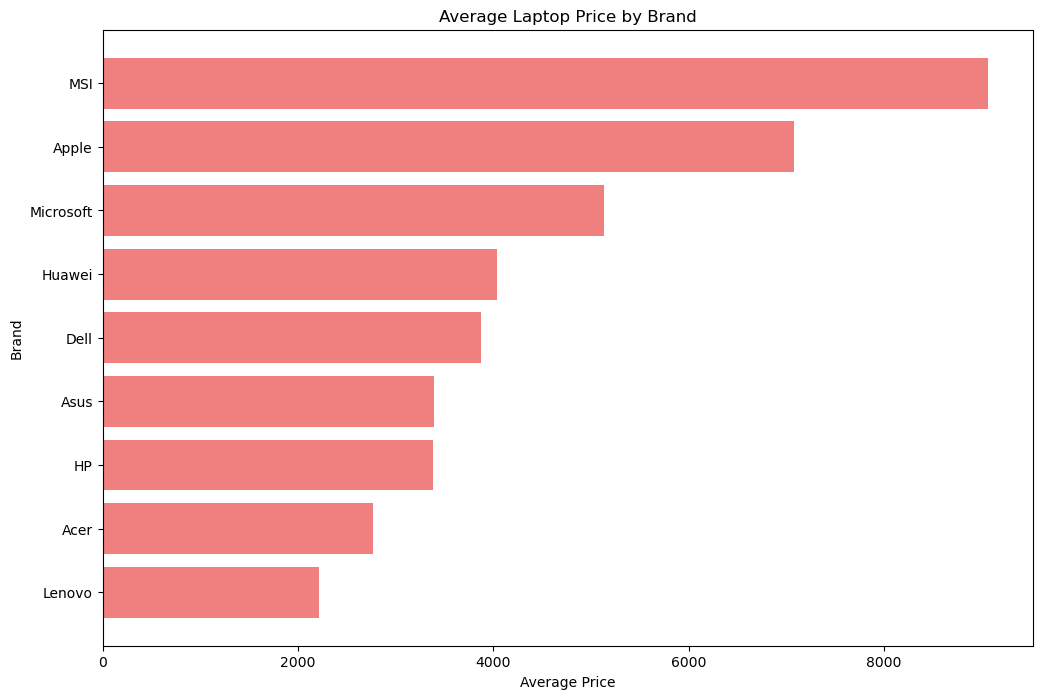

In [109]:
# Visualization to show Avg Price by Brand
avg_price_by_brand = df.groupby('brand')['old_price'].mean().sort_values()
plt.figure(figsize=(12, 8))
plt.barh(avg_price_by_brand.index, avg_price_by_brand.values, color='lightcoral')
plt.title('Average Laptop Price by Brand')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

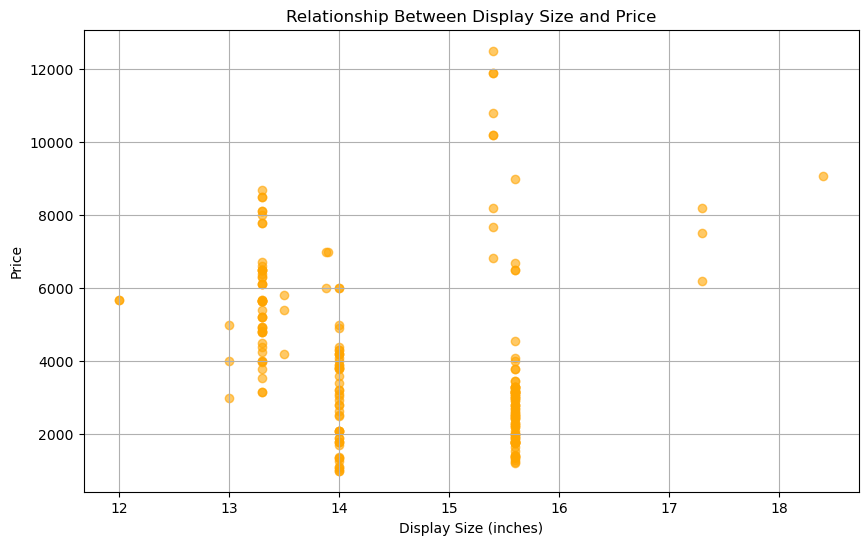

In [117]:
# Relationship Between Display Size and Price
plt.figure(figsize=(10, 6))
plt.scatter(df['display_size'], df['old_price'], alpha=0.6, color='orange')
plt.title('Relationship Between Display Size and Price')
plt.xlabel('Display Size (inches)')
plt.ylabel('Price')
plt.grid()
plt.show()

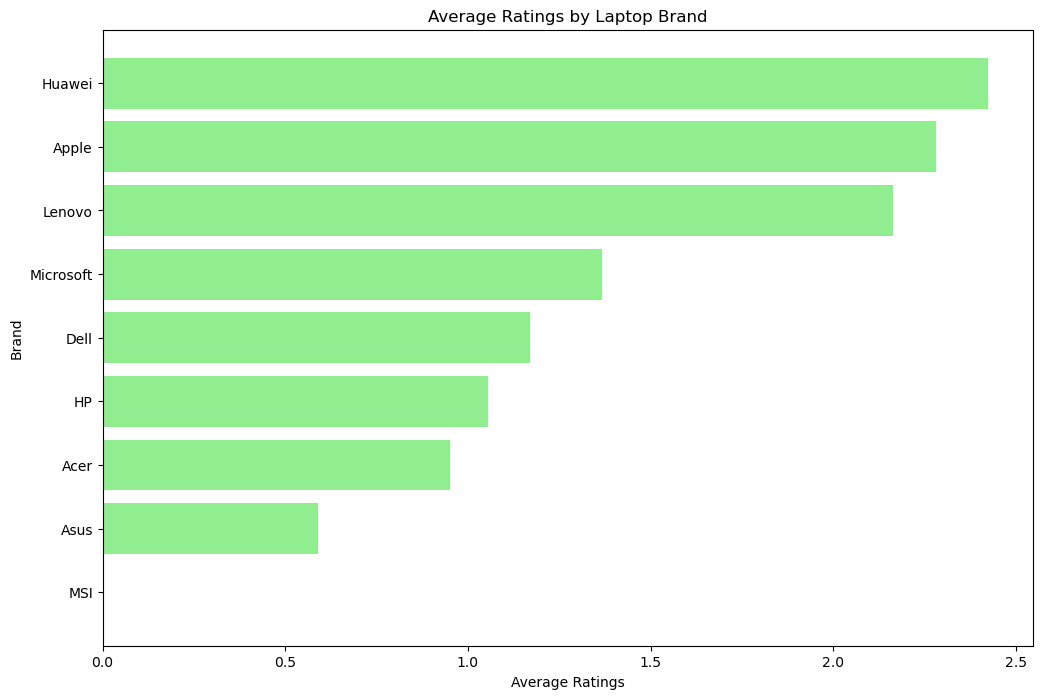

In [123]:
# Avg Rating by Brands
avg_ratings_by_brand = df.groupby('brand')['ratings_5max'].mean().sort_values()
plt.figure(figsize=(12, 8))
plt.barh(avg_ratings_by_brand.index, avg_ratings_by_brand.values, color='lightgreen')
plt.title('Average Ratings by Laptop Brand')
plt.xlabel('Average Ratings')
plt.ylabel('Brand')
plt.show()